# Word2Vec

Word2Vec converts words into dense numerical vectors.
Unlike BoW or TF-IDF (which only count words), Word2Vec captures *meaning*.
Words with similar meaning end up with similar vectors.

Example:
“king” ≈ “queen”
“walk” ≈ “run”
“doctor” ≈ “nurse”

Word2Vec is learning **semantic meaning**, not text frequency.


### Why We Need Word2Vec

Sparse vectors like BoW/TF-IDF:
• huge size
• no idea of word meaning
• cat, dog become unrelated even though both are animals
• can't do arithmetic (king - man + woman = queen)

Word2Vec solves this using neural networks.


### How Word2Vec Learns Meaning

If many sentences show
“dog eats food”
“dog is friendly”
“dog loves bone”

model will place *dog* vector close to *pet*, *animal*

You don’t have to do this mathematically — library handles everything.

The algorithm itself has two training styles:

### **CBOW** (Continuous Bag of Words)

Predict the **target word** from surrounding context.

Input: “I ____ programming”
Context: I, programming
Model predicts: *love*

Good for smaller datasets.

### **Skip-Gram**

Predict the **context words** from a target word.

Input: “NLP”
Predicts: (I, love, learning)

Good for larger datasets, captures rare words better.


## Main concepts in Word2Vec

### Window size

How many nearby words you consider as “context”.
Small window → meaning
Large window → topic

### Vector size

Dimension of the embedding (100, 200, 300).
Higher dimension → more semantic detail but slower training.

### Min count

Ignore words appearing less than this number.

### Training Requirements

Before Word2Vec, text must be cleaned:

- tokenization
- lowercasing
- removing punctuation
- optional: stop-words removal
- lemmatization

After preprocessing, you feed a *list of token lists* to Word2Vec.


## Implementation using **gensim**

In [ ]:
pip install gensim

In [4]:
sentences = [
    "I love drinking coffee on rainy mornings",
    "The street market sells fresh fruits and vegetables",
    "My dog enjoys playing in the park",
    "People often listen to music while traveling",
    "Warm sunlight makes the weekend feel relaxing",
    "Friends gathered to celebrate a birthday party",
    "The cafe near my house makes delicious sandwiches",
    "Kids were running and laughing in the playground",
    "I enjoy evening walks to clear my mind",
    "The movie last night was funny and entertaining"
]


In [5]:
from gensim.utils import simple_preprocess
from gensim.models import Word2Vec
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
stop_words = set(stopwords.words("english"))

# preprocessing function with stop-word removal
def preprocess(texts):
    cleaned = []
    for t in texts:
        tokens = simple_preprocess(t)      # tokenize + clean
        tokens = [w for w in tokens if w not in stop_words]   # remove stop words
        cleaned.append(tokens)
    return cleaned

sentences_cleaned = preprocess(sentences)
sentences_cleaned

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[['love', 'drinking', 'coffee', 'rainy', 'mornings'],
 ['street', 'market', 'sells', 'fresh', 'fruits', 'vegetables'],
 ['dog', 'enjoys', 'playing', 'park'],
 ['people', 'often', 'listen', 'music', 'traveling'],
 ['warm', 'sunlight', 'makes', 'weekend', 'feel', 'relaxing'],
 ['friends', 'gathered', 'celebrate', 'birthday', 'party'],
 ['cafe', 'near', 'house', 'makes', 'delicious', 'sandwiches'],
 ['kids', 'running', 'laughing', 'playground'],
 ['enjoy', 'evening', 'walks', 'clear', 'mind'],
 ['movie', 'last', 'night', 'funny', 'entertaining']]

In [7]:
# build Word2Vec model
model = Word2Vec(
    sentences=sentences_cleaned,
    vector_size=100,
    window=2,
    min_count=1,
    workers=4, # no. of CPU cores/threads used for training (parallelization)
    sg=0   # 0 = CBOW, 1 = Skip-gram
)

# train the model
model.train(sentences_cleaned, total_examples=len(sentences_cleaned), epochs=1)
# → returns something like (48, 53)

(10, 51)

### How to use the trained model

In [19]:
# Check the vector of a word

print(model.wv["drinking"])

[-0.00250853 -0.005902    0.00747795 -0.00725519 -0.00898757 -0.00181586
 -0.00839247  0.00040985  0.00196024 -0.00249951 -0.00643305 -0.00031696
 -0.00108063  0.00351688  0.00813658  0.00584728  0.00844234 -0.00896782
  0.00946101 -0.00237243  0.00871686  0.00238171  0.00358269 -0.00958808
 -0.00947618  0.00897686 -0.00289685  0.00282636  0.00642753 -0.00030191
  0.00972799 -0.00103236 -0.00965689 -0.00709152 -0.00103299 -0.00866024
  0.00741856  0.0035982  -0.00877254  0.00847251  0.00893029  0.00583635
  0.00691711 -0.00958592  0.00050664 -0.00924366 -0.00366202  0.00023192
 -0.00027394  0.00146617  0.00329766  0.00213988  0.00530181  0.00752824
 -0.00587638  0.00796257  0.00600031  0.00978668  0.00461341 -0.00333833
 -0.00375223 -0.00061623 -0.0016465   0.00988674  0.00110971  0.0040249
  0.00341673 -0.00884662  0.00671335  0.0082139  -0.00164691  0.00232645
 -0.00646842 -0.00610648  0.00824665 -0.00303201  0.00673869  0.00156473
 -0.00199351  0.0030793  -0.00404053 -0.00177906  0.

In [20]:
# Find most similar words

print(model.wv.most_similar("drinking"))


[('sandwiches', 0.2228662222623825), ('vegetables', 0.1713821291923523), ('rainy', 0.15763773024082184), ('funny', 0.14805267751216888), ('last', 0.13263241946697235), ('entertaining', 0.12803851068019867), ('dog', 0.11423809081315994), ('coffee', 0.10890135914087296), ('park', 0.10839570313692093), ('relaxing', 0.10196366161108017)]


In [21]:
# Find similarity between two words
print(model.wv.similarity("coffee", "drinking"))


0.10890137


## t-SNE Visualization for Word2Vec Model

## What t-SNE is

t-SNE (t-Distributed Stochastic Neighbor Embedding) is a **dimensionality reduction technique**.
Our Word2Vec embeddings are 100-dimensional vectors — impossible to see directly.
t-SNE compresses these vectors into **2 dimensions** so you can plot them on a graph.

What t-SNE tries to do:

* keep **similar words close together**
* push **unrelated words far apart**

It’s mainly used for **visualizing clusters**.



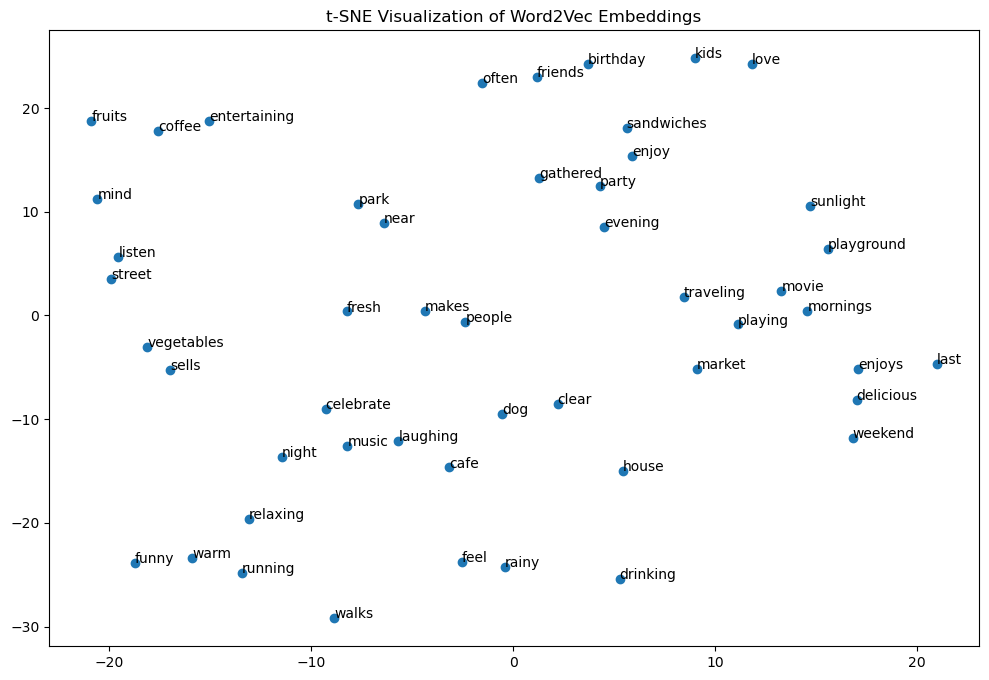

In [27]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# words to visualize
words = list(model.wv.key_to_index.keys())

# get vectors for these words
word_vectors = model.wv[words]

# apply TSNE (reduce 100-d vectors to 2-d)
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
reduced = tsne.fit_transform(word_vectors)

# plot
plt.figure(figsize=(12, 8))
plt.scatter(reduced[:, 0], reduced[:, 1])

# add labels
for i, word in enumerate(words):
    plt.annotate(word, (reduced[i, 0], reduced[i, 1]))

plt.title("t-SNE Visualization of Word2Vec Embeddings")
plt.show()


### How to interpret a t-SNE plot

#### If two words appear close together

→ The model believes they have similar meaning or are used in similar contexts.
Example: *coffee, morning, cafe* may form a cluster.

#### If words appear in small groups

→ These are semantic clusters (food, emotions, activities, locations, etc.).

#### If a word is far away from others

→ It is unique in meaning or the model had limited context to learn it.

#### t-SNE is not for precise measurement

It is only for **visual understanding**.
Distances are approximate, not mathematically exact.



### Save and load model

In [ ]:
model.save("word2vec.model")

In [24]:
from gensim.models import Word2Vec

loaded = Word2Vec.load("word2vec.model")

vector = loaded.wv["coffee"]
print(vector)

[-2.4348151e-04  4.2238366e-03  2.1060910e-03  9.9952137e-03
  6.1077182e-04 -5.4998221e-03 -1.2149073e-03  2.1141502e-03
 -3.3573343e-03 -7.8960313e-03 -5.5882838e-03 -6.7527979e-03
  6.3652908e-03  3.9575803e-03  8.2254969e-03  6.5167658e-03
 -6.1245393e-03  2.7004539e-03  8.4942961e-03  1.5807694e-03
  3.0816908e-03  5.8128866e-03 -8.8415351e-03  9.1184843e-03
  6.8258410e-03  8.4984461e-03 -8.2328944e-03  6.1852448e-03
  6.6474536e-03 -1.3576243e-03 -6.2854621e-03  5.3168996e-03
 -6.8545439e-03 -5.3794221e-03  3.5228087e-03  8.0964873e-03
  8.6981365e-03 -4.4277967e-03 -9.2162406e-03  9.5971962e-03
  6.2894537e-03 -3.9776447e-03 -8.4698787e-03 -4.7434061e-03
 -3.9467234e-03 -3.3027558e-03  8.2325132e-04 -3.1553756e-04
 -3.1123816e-03 -5.9904819e-03  9.4435206e-03 -4.7254050e-03
 -7.2864858e-03  7.6992270e-03  2.5408785e-03  8.6348746e-03
 -4.4431966e-03 -6.9015897e-03  9.7201153e-04 -1.1811046e-03
 -9.4162896e-03 -1.5949875e-03  3.0733279e-03  6.5909661e-03
  6.8289079e-03  3.23039

 ---

* Word2Vec doesn’t count words; it *learns meaning*.
* Words with similar usage become close vectors.
* CBOW → predict word
* Skip-gram → predict context
* Word2Vec embeddings are dense, continuous, and good for ML/DL models.
* TF-IDF = frequency-based; Word2Vec = meaning-based.

### When to use Word2Vec in an NLP project

Use it when your task needs **semantic understanding**:

* sentiment analysis
* text classification
* recommendation systems
* search and matching
* similarity tasks
* clustering

Do not use it when:

* interpretability of features matters
* the dataset is extremely tiny
* simple frequency features are enough


# Pretrained Word2Vec model 

Instead of training Word2Vec on your small dataset, you use a model that was already trained on a **huge corpus**.

Google’s Word2Vec was trained on:

* 3 million words
* 300-dimensional vectors
* 100 billion tokens of Google News

This means the model already learned rich semantic meanings.

You don’t need to train it — **you just load it and use it.**

#### Why use pretrained Word2Vec

Because:

* it understands far more vocabulary than your small dataset
* it gives high-quality embeddings
* it captures deep semantic relationships
* saves training time (model is already trained)


### Download Google’s pre-trained Word2Vec

* File: [`GoogleNews-vectors-negative300.bin.gz`](https://code.google.com/archive/p/word2vec/)
* 3GB in size, trained on Google News corpus
* Binary format: `binary=True`


In [ ]:
from gensim.models import KeyedVectors

# load Google's pretrained Word2Vec
model = KeyedVectors.load_word2vec_format(
    "GoogleNews-vectors-negative300.bin.gz",
    binary=True
)

In [ ]:
# Get vector of a word
print(model["coffee"])

# Check similarity
print(model.similarity("king", "queen"))

# Find most similar words

print(model.most_similar("coffee"))

In [ ]:
# Check if a word exists

"coffee" in model

### Using pretrained vectors for your NLP task

The real goal is converting sentences into embeddings using these pretrained word vectors.

Example: average embeddings:

```python
import numpy as np

def sentence_vector(sentence, model):
    words = sentence.lower().split()
    vecs = [model[w] for w in words if w in model]
    
    if len(vecs) == 0:
        return np.zeros(300)
    
    return np.mean(vecs, axis=0)

sent = "I love drinking coffee"
vec = sentence_vector(sent, model)
print(vec.shape)
```

This gives you a **300-dimensional vector for the entire sentence**.
